### 1. Small Multiples


#### 1.1 Please create a 3X3 grid of subplot (not data needed), describe the advantage of applying small multiples in data visualization. Submit the screenshot of the graph and code (commented properly)


(<Figure size 432x288 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f62b54f10>,
       dtype=object))

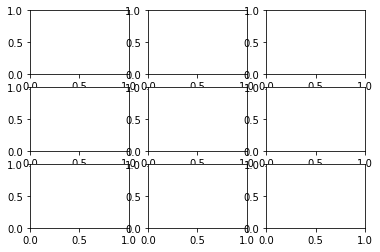

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(3, 3)


Advantages:
* It can seperate individual entities, which helps reduce the overlapping of graphs
* It obeys one primary principle of building graphs: aligned where graphs are parallel on a same surface
* Readers can compare and contrast

#### 1.2 Create a line chart which contains multiple lines. Analysis the data based on your line chart. Submit a screenshot of the graph which contains the selection object and a screenshot of your code (commented properly).


In [ ]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sb
from vega_datasets import data

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


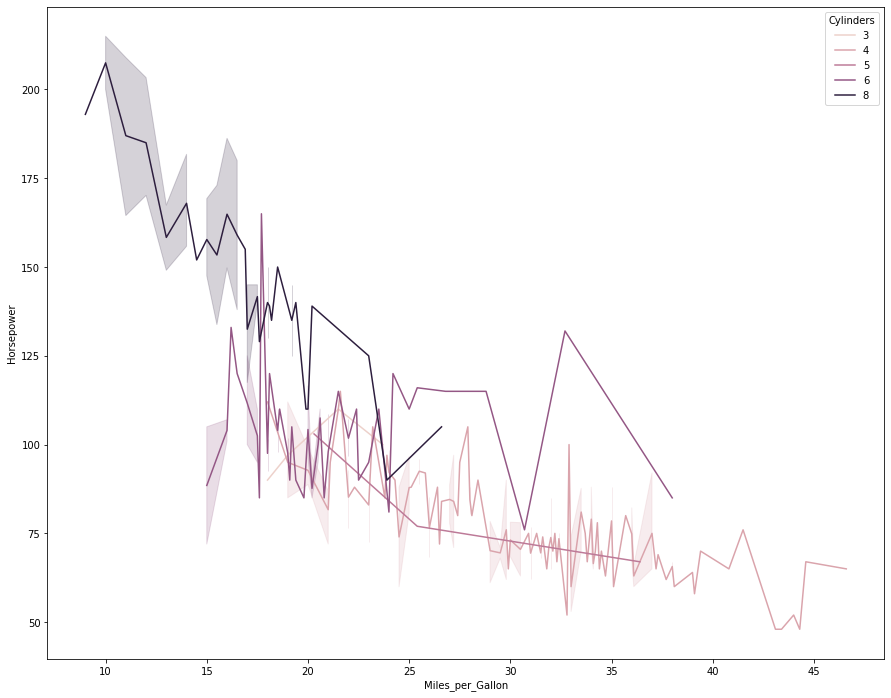

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)
sb.lineplot(data=cars, x='Miles_per_Gallon', y='Horsepower', hue='Cylinders')

#### 1.3 Use small multiples to separate the above chart into multiple subplots. Submit a screenshot of the multiple plots and a screenshot of your code (commented properly). Describe differences/similarities between these subplots. Analysis the data based on the plots.

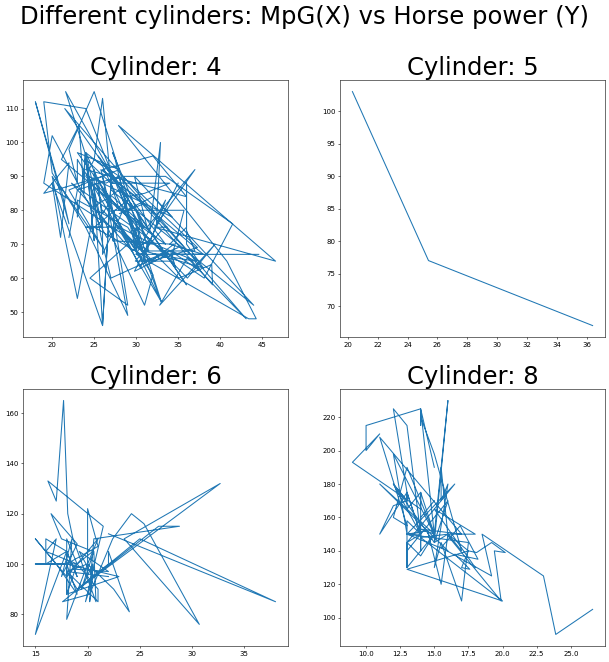

In [ ]:
# make multiple subplots.
# you can define the size of figure and dpi (dot per inch, defalt dpi=72)
my_dpi = 50
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15), dpi=my_dpi)

sub_df = cars.iloc[:, [1, 2, 4]]
sub_df1 = sub_df[sub_df['Cylinders'] == 4]
sub_df2 = sub_df[sub_df['Cylinders'] == 5]
sub_df3 = sub_df[sub_df['Cylinders'] == 6]
sub_df4 = sub_df[sub_df['Cylinders'] == 8]

# title for entire figure
fig.suptitle("Different cylinders: MpG(X) vs Horse power (Y)", fontsize=35, color="black")

# edit subplots
axes[0, 0].set_title("Cylinder: 4", fontsize=35, color="black")
axes[0, 0].plot(sub_df1['Miles_per_Gallon'], sub_df1['Horsepower'])
axes[0, 1].set_title("Cylinder: 5", fontsize=35, color="black")
axes[0, 1].plot(sub_df2['Miles_per_Gallon'], sub_df2['Horsepower'])
axes[1, 0].set_title("Cylinder: 6", fontsize=35, color="black")
axes[1, 0].plot(sub_df3['Miles_per_Gallon'], sub_df3['Horsepower'])
axes[1, 1].set_title("Cylinder: 8", fontsize=35, color="black")
axes[1, 1].plot(sub_df4['Miles_per_Gallon'], sub_df4['Horsepower'])


### 2. Linked Highlighting with Brushing


#### 2.1 Create two different types of charts (scatter plot, bar chart, line chart, etc.) based on your dataset. Submit a screenshot of the graph and a screenshot of your code (commented properly).

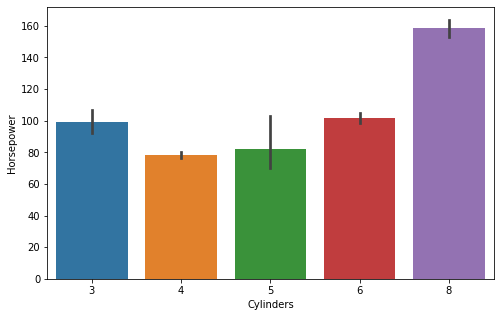

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
sb.barplot(data=sub_df, x='Cylinders', y='Horsepower')

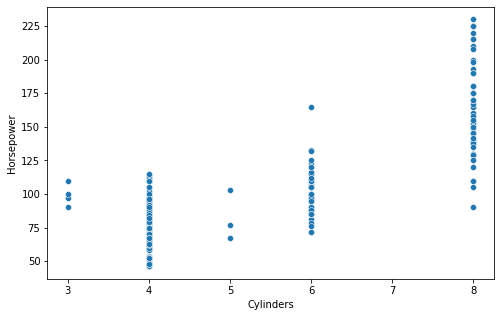

In [ ]:
sb.scatterplot(data=sub_df, x='Cylinders', y='Horsepower')

#### 2.2 Linking these two charts, selecting one element in one chart, and seeing linked highlights the other chart (Brushing and linking). Submit screenshots of the graph and a screenshot of your code (commented properly).

In [ ]:
import altair as alt

brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(cars).mark_point().encode(
    y='Miles_per_Gallon', # y axis
    color=alt.condition(brush, # type 
                        'Origin', # legend
                        alt.ColorValue('gray')) # color value
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration') # X labels for different subplots

alt.HConcatChart(...)

#### 2.3 What are the pros and cons of Brushing and Linking? Give sufficient explanation with examples. 

* Pros:
    - Changes in one visualization will reflect in others interactively
    - It provides more information than individual visualization

### 3. Linked Navigation

#### 3.1 Show part of the dataset and show these locations on the map. Submit a screenshot of the dataset and the map, and a screenshot of your code (commented properly).


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/teohangxanh/5320/main/ICE-11/park%20locations.csv')
df.head()

,Place Name,Latitude,Longitude
0,"Capitol Reef National Park, UT, USA",38.089600,-111.149910
1,"Pinnacles National Park, CA, USA",36.491508,-121.197243
2,"Rocky Mountain National Park, CO, USA",40.343182,-105.688103
3,"Offshore Trap/Pot Waters Area, Western Atlanti...",38.000000,-82.000000
4,"Steller Sea Lion Protection Area, AL, the US",57.466667,-153.433334


Text(0.5, 1.0, 'US National Parks')

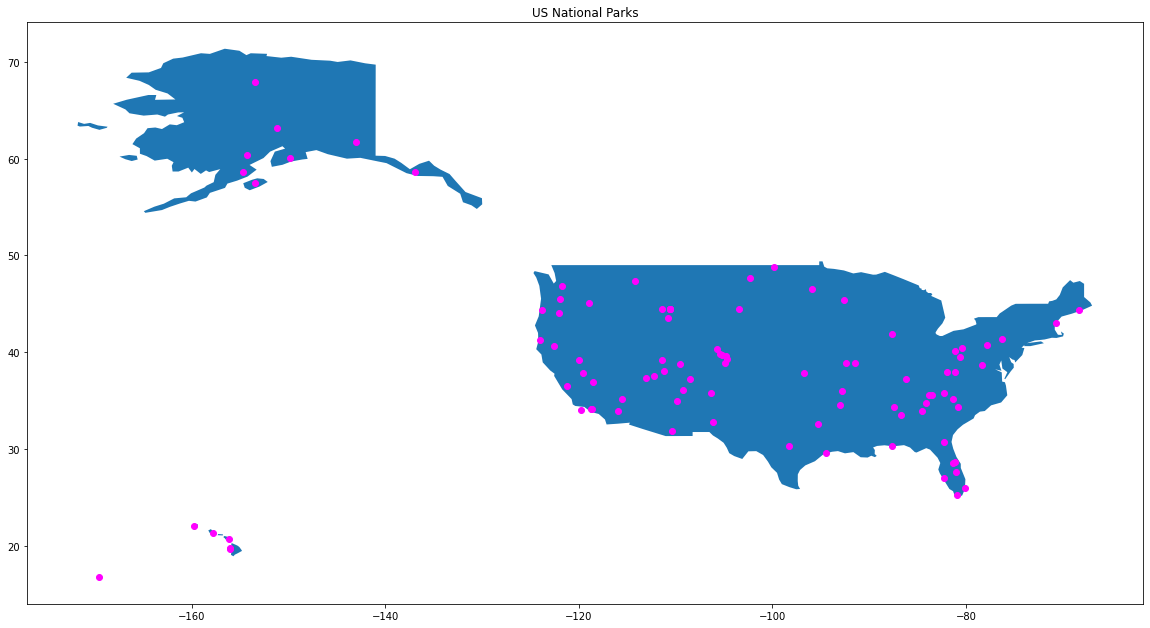

In [ ]:
import geopandas as gpd
import mplcursors

plt.rcParams["figure.figsize"] = (20, 25)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
usa = world[world['iso_a3'] == 'USA']
axis = usa.plot()
df_geo.plot(ax=axis, color='magenta')
mplcursors.cursor(hover=True)
plt.title('US National Parks')

#### 3.2 Add Tooltip to your map, submit a screenshot of the map and the code (commented properly).


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states', # choose map of the US
    lon = df['Longitude'], # self-explained
    lat = df['Latitude'], # self-explained
    text = df['Place Name'], # self-explained
    marker = dict(
        line_color='rgb(40,40,40)',
        line_width=0.5,
        )))


fig.update_layout(
        title_text = 'US National Parks',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(10, 250, 250)', # 3 channel RGB represent land color
        )
    )

fig.show()


#### 3.3 Add a new column ‘Color’ to your csv. Build a function to separate all locations into different colors. Show the new dataset (include the color column) and reload the map with color. Submit a screenshot of the dataset and the map, and a screenshot of your code (commented properly).

In [ ]:
# If lat < 40, color = magenta, otherwise yellow
df['color'] = np.where(df['Latitude'] < 40, 'magenta', 'yellow')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states', # choose map of the US
    lon = df['Longitude'], # self-explained
    lat = df['Latitude'], # self-explained
    text = df['Place Name'], # self-explained
    marker = dict(
        line_color='rgb(40,40,40)',
        line_width=0.5,
        color = df['color'],
        )))


fig.update_layout(
        title_text = 'US National Parks',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(10, 250, 250)', # 3 channel RGB represent land color
        )
    )

fig.show()